## Personal Data

* Name  : Adil Faruq Habibi
* Email : adilfaruqhabibi@gmail.com
* Phone : +6285265408417
* Kota  : Kota Jakarta Timur, DKI Jakarta

## Installing Libraries

In [2]:
# Download All Dependencies
!pip install -q kaggle

# updating (server 1.5.12 / client 1.5.4)
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6ce3d238ed1f74d00f04687b594b671e0e50e1932aef171cadcbc2b22dba5b20
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 4.9 MB/s 
     |████████████████████████████████| 895 kB 70.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Import Required Library

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import f1_score, jaccard_score, confusion_matrix, classification_report

## Data Collection

In [ ]:
# Upload API Files from Kaggle
from google.colab import files
files.upload()

In [6]:
# Connect Collab to Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [7]:
# Searching heart disease datasets
! kaggle datasets list -s heart

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/heart-failure-clinical-data                         Heart Failure Prediction                           4KB  2020-06-20 01:03:20          74430       1568  1.0              
ronitf/heart-disease-uci                                      Heart Disease UCI                                  3KB  2018-06-25 11:33:56         276929       5640  0.7647059        
fedesoriano/heart-failure-prediction                          Heart Failure Prediction Dataset                   9KB  2021-09-10 18:11:57          47585       1572  1.0              
rashikrahmanpritom/heart-attack-analysis-prediction-dataset   Heart Attack Analysis &

In [8]:
# download dataset heart-failure-prediction from fedesoriano
!kaggle datasets download "fedesoriano/heart-failure-prediction"

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 5.87MB/s]


In [9]:
# unzip dataset
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


## Data Loading

In [2]:
# buat pandas dataframe
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Cleaning

Berdasarkan informasi dari https://www.healthline.com/health/serum-cholesterol, ditemukan bahwa kandungan serum cholesterol tidak memungkinkan untuk bernilai 0 md/dL. Sehingga disimpulkan nilai 0 pada data adalah missing value

In [5]:
# Cek missing values untuk kolom cholesterol
print((data.Cholesterol == 0).sum())

172


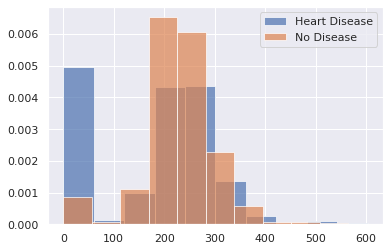

In [6]:
# distribusi data cholesterol ketika terdapat missing values
plt.hist(data[data.HeartDisease==1]['Cholesterol'], density=True, label='Heart Disease', alpha=0.7)
plt.hist(data[data.HeartDisease==0]['Cholesterol'], density=True, label='No Disease', alpha=0.7)
plt.legend()
plt.show()

In [7]:
# impute missing values dengan strategi mean
data['Cholesterol'] = data.Cholesterol.replace(0, np.nan)
data['Cholesterol'] = data.Cholesterol.fillna(data.groupby('HeartDisease').Cholesterol.transform('mean'))
pd.DataFrame(data.Cholesterol.describe()).T

,count,mean,std,min,25%,50%,75%,max
Cholesterol,918.0,245.571653,53.380997,85.0,214.0,250.0,267.0,603.0


In [8]:
print((data.Cholesterol == 0).sum())

0


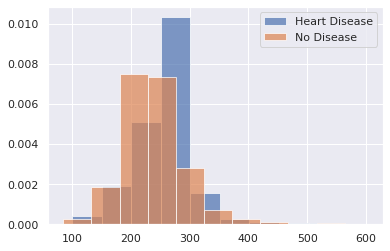

In [9]:
# distribusi data cholesterol terbaru
plt.hist(data[data.HeartDisease==1]['Cholesterol'], density=True, label='Heart Disease', alpha=0.7)
plt.hist(data[data.HeartDisease==0]['Cholesterol'], density=True, label='No Disease', alpha=0.7)
plt.legend()
plt.show()

## EDA

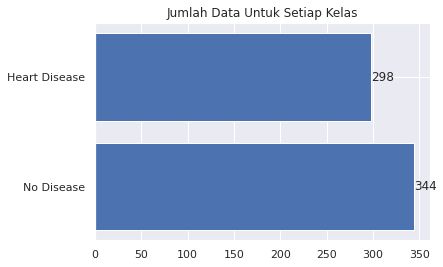

In [124]:
# jumlah data masing-masing kelas
bar_plot = plt.barh(
    np.unique(data.HeartDisease).astype('str'),
    data.HeartDisease.value_counts()
)
plt.bar_label(bar_plot)
plt.title('Jumlah Data Untuk Setiap Kelas')
plt.yticks(labels=['Heart Disease', 'No Disease'], ticks=[1,0])
plt.show()

In [11]:
# Pembagian label fitur kategorikal dan numerikal
categorical_features = data.select_dtypes(include=['object']).columns.tolist() + ['FastingBS']
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('FastingBS')
numerical_features.remove('HeartDisease')

print('Categorical features : \n', categorical_features, '\n')
print('numerical features : \n', numerical_features)

Categorical features : 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS'] 

numerical features : 
 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


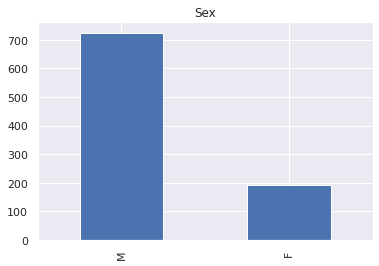

,jumlah sampel,proporsi(%)
M,725,79.0
F,193,21.0


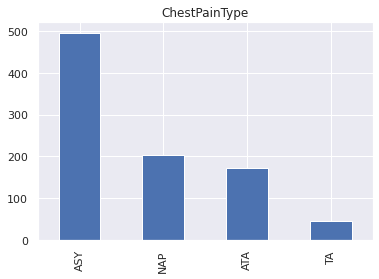

,jumlah sampel,proporsi(%)
ASY,496,54.0
NAP,203,22.1
ATA,173,18.8
TA,46,5.0


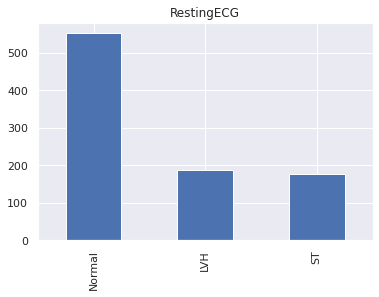

,jumlah sampel,proporsi(%)
Normal,552,60.1
LVH,188,20.5
ST,178,19.4


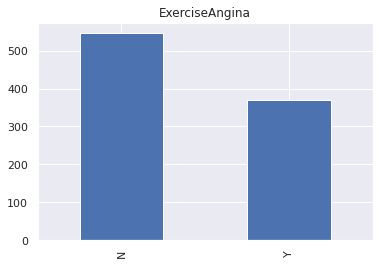

,jumlah sampel,proporsi(%)
N,547,59.6
Y,371,40.4


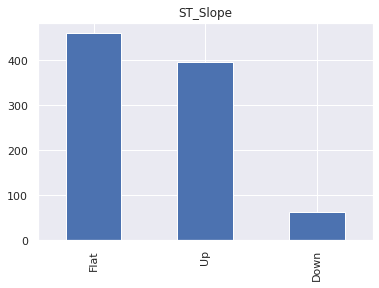

,jumlah sampel,proporsi(%)
Flat,460,50.1
Up,395,43.0
Down,63,6.9


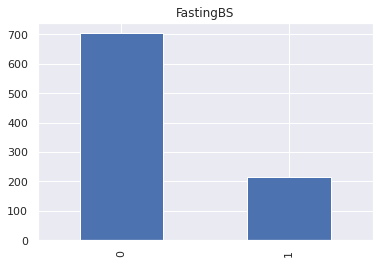

,jumlah sampel,proporsi(%)
0,704,76.7
1,214,23.3


In [12]:
# explorasi categorical features
for feature in categorical_features:
  count = data[feature].value_counts()
  percent = 100*data[feature].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel':count, 'proporsi(%)':percent.round(1)})
  count.plot(kind='bar', title=feature, stacked=False)
  plt.show()
  display(df)
  print('\n\n')

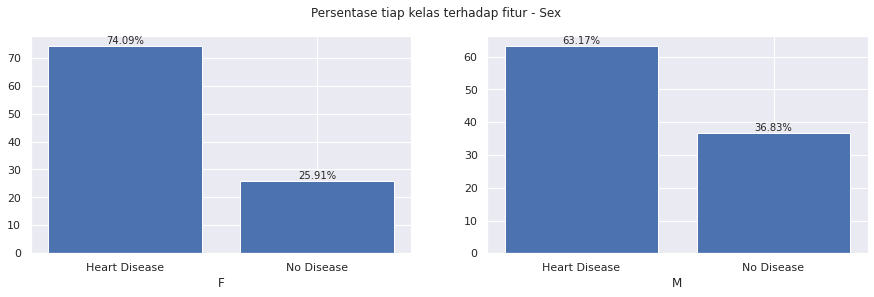

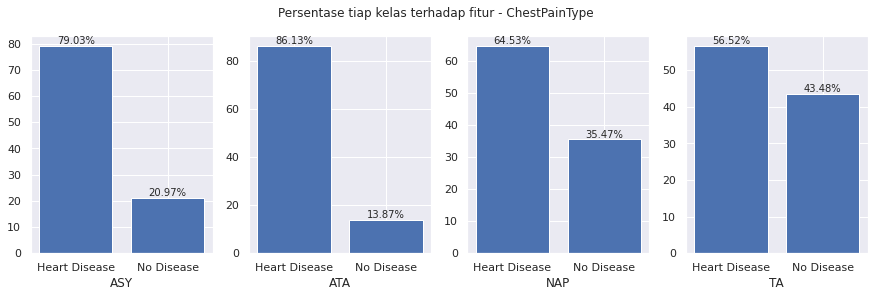

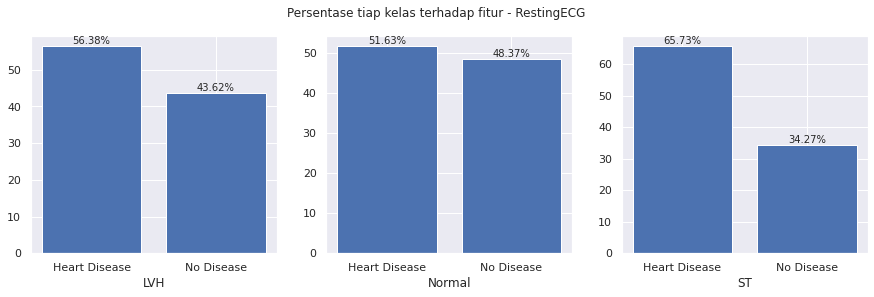

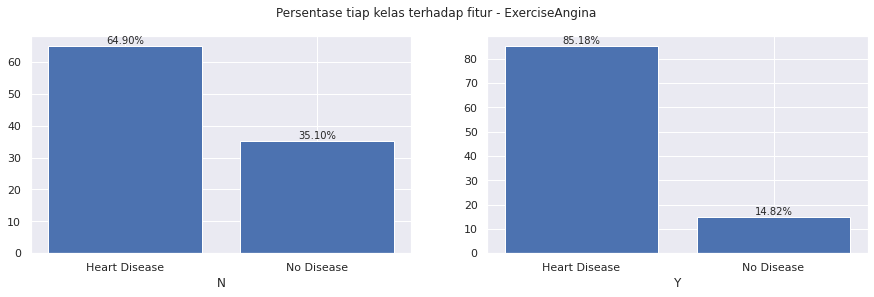

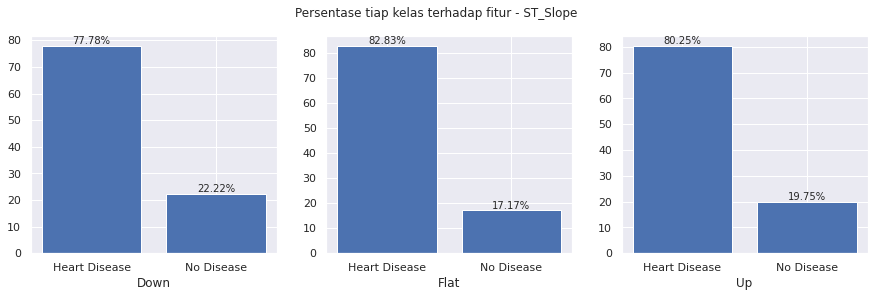

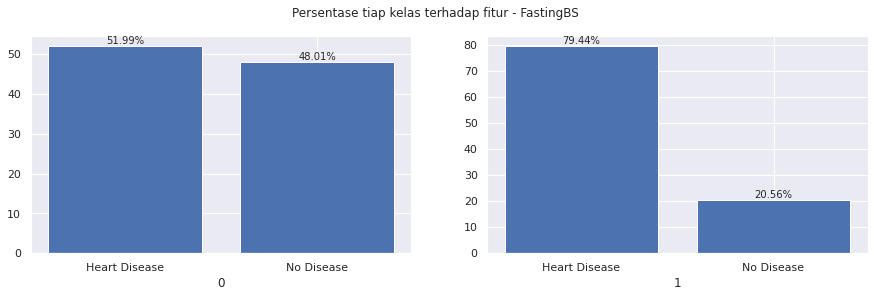

In [13]:
# Persentase tiap kelas terhadap kategorikal
for feature in categorical_features:
  idxes = np.unique(data[feature])
  fig, ax = plt.subplots(1, len(idxes), figsize=(15,4))
  fig.suptitle('Persentase tiap kelas terhadap fitur - '+feature)
  for i, idx in enumerate(idxes):
    bar_plot = ax[i].bar(
        ['Heart Disease', 'No Disease'],
        data.groupby(feature)['HeartDisease'].value_counts(normalize=True)[idx] * 100
    )
    ax[i].set_xlabel(idx)
    ax[i].bar_label(bar_plot, fmt='%.2f%%')
    fig.show()

In [14]:
numerical_features

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

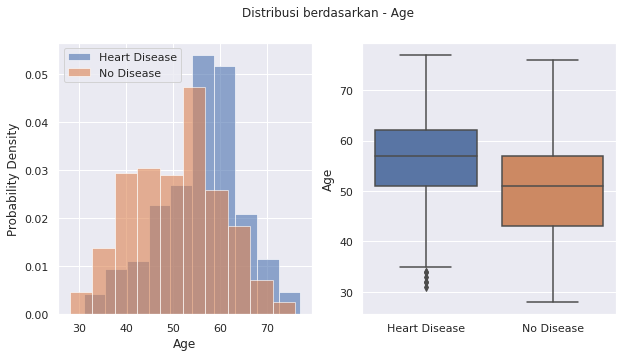

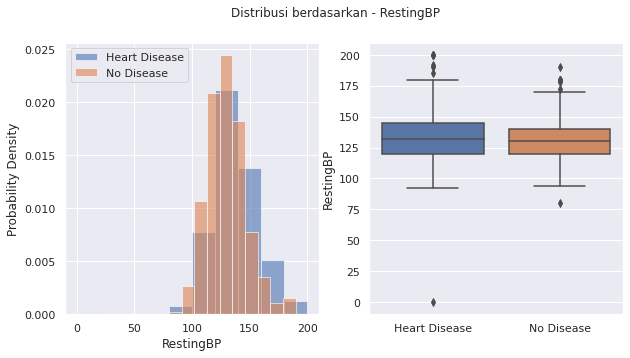

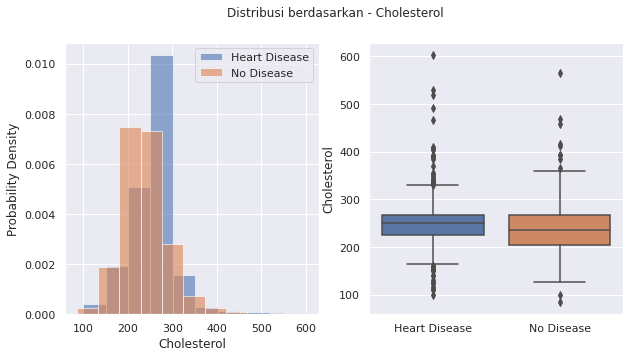

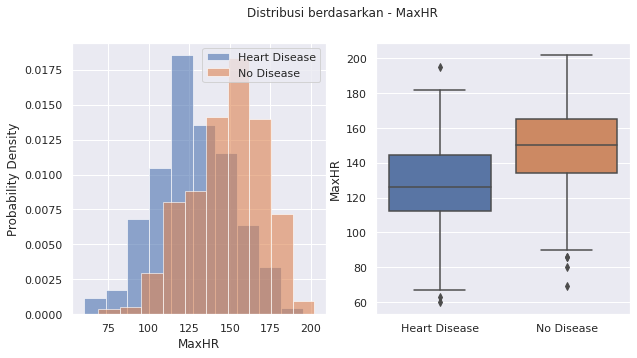

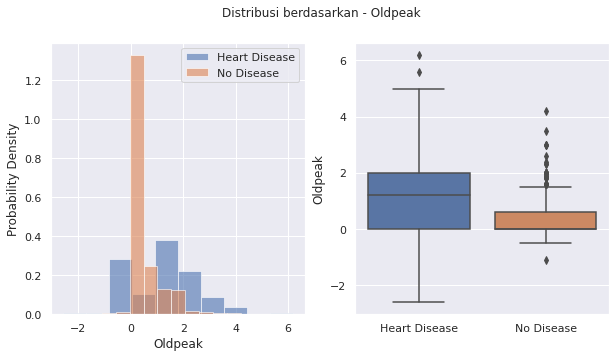

In [15]:
# Dsitribusi dan cek outlier tiap kelas terhadap numerikal fitur
for feature in numerical_features:
  fig, ax = plt.subplots(1, 2, figsize=(10,5))
  fig.suptitle('Distribusi berdasarkan - '+feature)
  ax[0].hist(data[data.HeartDisease==1][feature], label='Heart Disease', alpha=0.6, density=True)
  ax[0].hist(data[data.HeartDisease==0][feature], label='No Disease', alpha=0.6, density=True)
  ax[0].set_xlabel(feature)
  ax[0].set_ylabel('Probability Density')
  ax[0].legend()

  sns.boxplot(data=[data[data.HeartDisease==1][feature],data[data.HeartDisease==0][feature]], ax=ax[1])
  ax[1].set_xticklabels(['Heart Disease', 'No Disease'])
  ax[1].set_ylabel(feature)

  fig.show()


In [16]:
# bersihkan data dari outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
# cek ukuran dataset setelah kita drop outliers
data.shape

(642, 12)

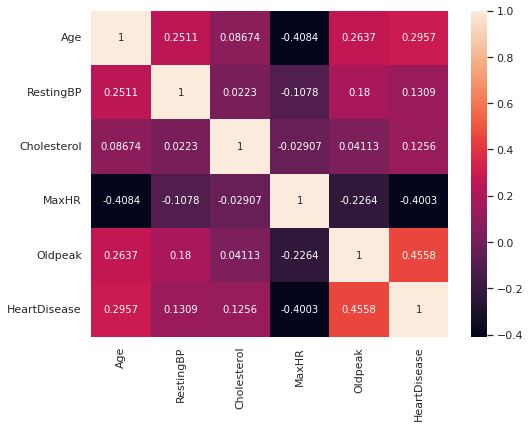

In [17]:
# Cek Korelasi dengan Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[numerical_features+['HeartDisease']].corr(), annot=True,fmt='.4g')
plt.show()

In [18]:
# bagi fitur dan target
y = data.HeartDisease
X = data.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [19]:
# mengurangi dimensi dengan PCA dengan pipeline dari data yang distandarisasi

# inisialisasi instances scaler dan pca
scaler = MinMaxScaler()
pca = PCA(random_state=123)

# buat pipline
pipeline = make_pipeline(scaler, pca)

# latih pipeline terhadap sample
pipeline.fit(X)

# ekstrak jumlah komponen yang digunakan
features = range(pca.n_components_)

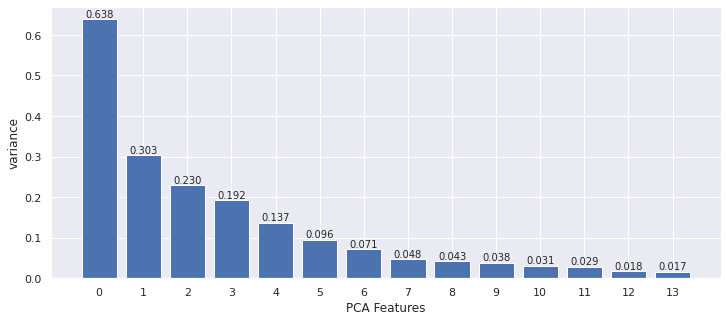

In [20]:
# tampilkan secara grafis the explained variances
plt.figure(figsize=(12,5))
bar_plot = plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.bar_label(bar_plot, fmt='%.3f')
plt.show()

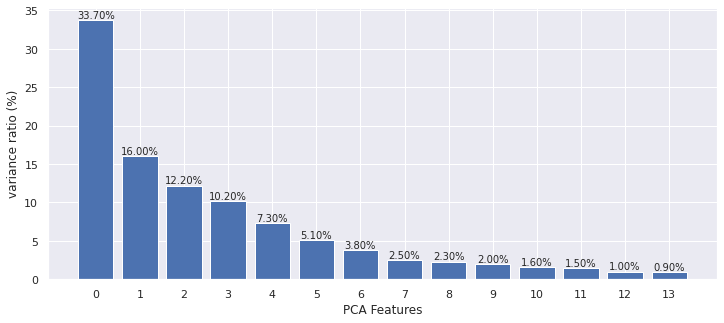

In [21]:
# tampilkan secara grafis rasio dari the explained variances
plt.figure(figsize=(12,5))
bar_plot = plt.bar(features, pca.explained_variance_ratio_.round(3)*100)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('variance ratio (%)')
plt.bar_label(bar_plot, fmt='%.2f%%')
plt.show()

In [22]:
# inisialisasi pca instences dengan jumlah komponen sebanyak 4
pca = PCA(n_components=4)

# normalisasi features
scaled_X = scaler.fit_transform(X)

# fit dan transform features
pca.fit(scaled_X)
pca_features = pca.transform(scaled_X)

# dimensi sesudah dan sebelum direduksi
pca_features.shape, scaled_X.shape

((642, 4), (642, 14))

In [23]:
# bagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(pca_features, y, test_size=0.2, random_state=123)

## Model Selection

> KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

> RandomForest

In [67]:
rf = RandomForestClassifier(n_estimators=70, max_depth=16, max_leaf_nodes=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

> AdaBoost

In [68]:
boosting = AdaBoostClassifier(random_state=42)                             
boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)

> SVM

In [69]:
svc = svm.SVC(kernel='sigmoid', gamma='auto')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [113]:
# Buat dataframe berisikan score masing-masing algoritma dari data train dan test
score = pd.DataFrame()
 
# buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting, 'SVM': svc}
 
# hitung f1-score masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  score.loc[name, 'train'] = f1_score(y_train, y_pred=model.predict(X_train), average='weighted')
  score.loc[name, 'test'] = f1_score(y_test, y_pred=model.predict(X_test), average='weighted')
  
# Panggil score
score

,train,test
KNN,0.863615,0.822308
RF,0.918186,0.875969
Boosting,0.896764,0.875969
SVM,0.863671,0.853035


> Model yang dipilih adalah AdaBoost. Ini dikarenakan bias yang lebih rendah apabila dibandingkan dengan RandomForest

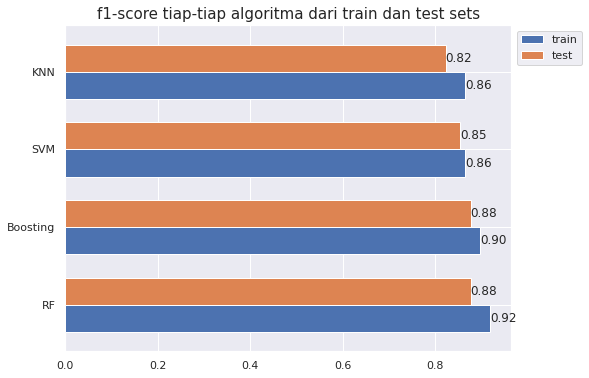

In [118]:
# visualisasi score pada masing-masing algoritma terhadap data train dan test
fig, ax = plt.subplots(figsize=(8,6))
score.sort_values(by='test', ascending=False).plot.barh(ax=ax, width=0.7, zorder=3)
for container in ax.containers:
  ax.bar_label(container, fmt='%.2f')
plt.title('f1-score tiap-tiap algoritma dari train dan test sets', fontsize=15)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

# Model Evaluation

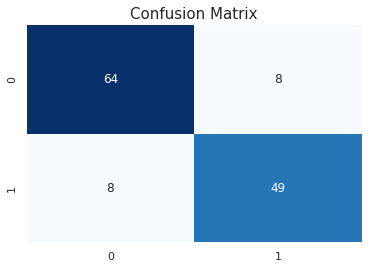

In [119]:
# hitung confusion matrix dari data testing
cnf_matrix = confusion_matrix(y_test, y_pred_boosting)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [62]:
print(classification_report(y_test, y_pred_boosting))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        72
           1       0.86      0.86      0.86        57

    accuracy                           0.88       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.88      0.88      0.88       129



In [107]:
prediksi = X_test[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_SVM
63,1,1,1,1,1
229,0,0,0,0,0
188,0,1,1,1,1
452,1,1,1,1,1
218,0,0,0,0,0


Hasil ujicoba tiap model terhadap 5 buah data menghasilkan satu buah kesalah prediksi (pada indeks: 188)